<a href="https://colab.research.google.com/github/Azimoj/WCS/blob/main/house_price_Mod%C3%A9lisation_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import time

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import *

from sklearn.ensemble import RandomForestRegressor
import xgboost

from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/train_modified.csv')

In [ ]:
df_train = df_train.drop('Unnamed: 0', axis=1)

In [ ]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No,No,No,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No,No,No,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No,No,No,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No,No,No,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No,No,No,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60,RL,62.0,7917,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No,No,No,0,8,2007,WD,Normal,175000
1455,20,RL,85.0,13175,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No,MnPrv,No,0,2,2010,WD,Normal,210000
1456,70,RL,66.0,9042,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,20,RL,68.0,9717,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No,Attchd,1950.0,U

In [ ]:
df_train = df_train.drop('Id', axis=1)

In [ ]:
df_train.shape

(1459, 80)

In [ ]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
(df_train.isna().sum()).sum()

0

In [ ]:
correlation_matrix = df_train.corr(numeric_only=True)

In [ ]:
columns_only_num_corr = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice'])>=0.5].sort_values(ascending=False).drop('SalePrice').index

In [ ]:
columns_only_num_corr = list(columns_only_num_corr)
columns_only_num_corr.extend(['SalePrice'])
columns_only_num_corr

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

In [ ]:
columns_num_corr_cat = correlation_matrix['SalePrice'][abs(correlation_matrix['SalePrice'])>=0.5].sort_values(ascending=False).drop('SalePrice').index

In [ ]:
columns_num_corr_cat = list(columns_num_corr_cat)
columns_num_corr_cat.extend(['MSZoning', 'Neighborhood', 'Condition1', 'Exterior1st', 'ExterCond',
                            'Functional', 'SaleType', 'SaleCondition'])
columns_num_corr_cat.extend(['SalePrice'])
columns_num_corr_cat

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MSZoning',
 'Neighborhood',
 'Condition1',
 'Exterior1st',
 'ExterCond',
 'Functional',
 'SaleType',
 'SaleCondition',
 'SalePrice']

In [ ]:
def model_testing(scalers_num, scalers_cat, models, params,
                  datasets, scoring, refit='MSE', cv=5):


  df_results = pd.DataFrame(columns = ['Dataset', 'Scaler_cat', 'Scaler_num', 'Modèle'])

  for name, df in datasets.items():

    X = df.drop('SalePrice', axis=1)
    y = df['SalePrice']

    for scaler_num in scalers_num:
      for scaler_cat in scalers_cat:
        for model in models:

          categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
          numerical_columns = X.select_dtypes(exclude=['object', 'category']).columns.tolist()

          categorical_transformer = make_pipeline(scaler_cat)
          numerical_transformer = make_pipeline(scaler_num)

          preprocessor = ColumnTransformer(transformers=[
                                                          ('cat', categorical_transformer, categorical_columns),
                                                          ('num', numerical_transformer, numerical_columns)
                                                        ])

          t0 = time.time()

          pipeline = make_pipeline(preprocessor, model)

          grid = GridSearchCV(pipeline, param_grid=params[pipeline.steps[1][0]], cv=cv, return_train_score=True,
                              scoring = scoring, refit = refit)

          print(name+' | '+categorical_transformer.steps[0][0]+' | '+numerical_transformer.steps[0][0]+' | '+pipeline.steps[1][0]+' :')

          grid.fit(X, y)

          df_grid_results = pd.DataFrame(grid.cv_results_)
          df_grid_results['Dataset'] = name
          df_grid_results['Scaler_cat'] = categorical_transformer.steps[0][0]
          df_grid_results['Scaler_num'] = numerical_transformer.steps[0][0]
          df_grid_results['Modèle'] = pipeline.steps[1][0]


          df_results = pd.concat([df_results, df_grid_results], ignore_index=True)

          print("done in {:.0f} min".format((time.time() - t0)/60))
          print('-----------------------------------------------------------------------------------------')

  return df_results

In [ ]:
datasets = {
    "X_train_columns_only_num_corr" : df_train[columns_only_num_corr],
    "X_train_columns_num_corr_cat" : df_train[columns_num_corr_cat]
}

In [ ]:
scoring = {
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "R^2": "r2",
    "RMSLE": make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_log_error(np.abs(y_true), np.abs(y_pred))))
}

In [ ]:
scalers_num = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scalers_cat = [OneHotEncoder(drop='first', handle_unknown='ignore')]

models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), xgboost.XGBRegressor()]

params = {
    'linearregression': {

    },
    'lasso': {
        'lasso__alpha': [1.0, 0.2, 2]
    },
    'ridge': {
        'ridge__alpha': [1.0, 0.2, 2]
    },
    'elasticnet': {
        'elasticnet__alpha': [1.0, 0.2, 2],
        'elasticnet__l1_ratio': [0.5, 0.25, 0.75]
    },
    'randomforestregressor': {
        'randomforestregressor__n_estimators': [100, 200, 300],
        'randomforestregressor__max_depth': [None, 5, 10],
        'randomforestregressor__min_samples_split': [2, 10]
    },
    'xgbregressor': {
        'xgbregressor__n_estimators': [100, 200, 300],
        'xgbregressor__max_depth': [3, 10]
    }
}

In [ ]:
df_results = model_testing(scalers_num, scalers_cat, models, params, datasets, scoring)

X_train_columns_only_num_corr | onehotencoder | standardscaler | linearregression :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_only_num_corr | onehotencoder | standardscaler | lasso :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_only_num_corr | onehotencoder | standardscaler | ridge :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_only_num_corr | onehotencoder | standardscaler | elasticnet :
done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_only_num_corr | onehotencoder | standardscaler | randomforestregressor :
done in 2 min
-----------------------------------------------------------------------------------------
X_train_columns_only_num_corr | onehotencoder | standardscaler | xgbregressor :
don

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | standardscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | standardscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | standardscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | standardscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 5 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | standardscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | linearregression :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 6 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | minmaxscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | linearregression :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 6 min
-----------------------------------------------------------------------------------------
X_train_columns_num_corr_cat | onehotencoder | robustscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categ

done in 0 min
-----------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_results

,Dataset,Scaler_cat,Scaler_num,Modèle,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_train_RMSE,split1_train_RMSE,split2_train_RMSE,split3_train_RMSE,split4_train_RMSE,mean_train_RMSE,std_train_RMSE,split0_test_R^2,split1_test_R^2,split2_test_R^2,split3_test_R^2,split4_test_R^2,mean_test_R^2,std_test_R^2,rank_test_R^2,split0_train_R^2,split1_train_R^2,split2_train_R^2,split3_train_R^2,split4_train_R^2,mean_train_R^2,std_train_R^2,split0_test_RMSLE,split1_test_RMSLE,split2_test_RMSLE,split3_test_RMSLE,split4_test_RMSLE,mean_test_RMSLE,std_test_RMSLE,rank_test_RMSLE,split0_train_RMSLE,split1_train_RMSLE,split2_train_RMSLE,split3_train_RMSLE,split4_train_RMSLE,mean_train_RMSLE,std_train_RMSLE,param_lasso__alpha,param_ridge__alpha,param_elasticnet__alpha,param_elasticnet__l1_ratio,param_randomforestregressor__max_depth,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,param_xgbregressor__max_depth,param_xgbregressor__n_estimators
0,X_train_columns_only_num_corr,onehotencoder,standardscaler,linearregression,0.019907,0.005557,0.009782,0.002371,{},-9.789415e+08,-1.382156e+09,-1.678049e+09,-1.133216e+09,-2.482811e+09,-1.531035e+09,5.315491e+08,1.0,-1.543635e+09,-1.442277e+09,-1.382219e+09,-1.506233e+09,-1.211728e+09,-1.417219e+09,1.166054e+08,-31288.041502,-37177.361415,-40964.000764,-33663.268869,-49827.809983,-38584.096507,6504.012668,1.0,-39289.125630,-37977.324409,-37178.210071,-38810.223943,-34809.883018,-37612.953414,1576.196794,0.823060,0.789648,0.778557,0.776303,0.630955,0.759705,0.066510,1.0,0.762720,0.769040,0.769240,0.771894,0.804768,0.775532,0.014925,0.174578,0.329878,0.256474,0.223932,0.229858,0.242944,0.050887,1.0,0.243113,0.225195,0.220300,0.260238,0.243133,0.238396,0.014307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X_train_columns_only_num_corr,onehotencoder,standardscaler,lasso,0.024223,0.003106,0.010124,0.000744,{'lasso__alpha': 1.0},-9.789809e+08,-1.382128e+09,-1.678048e+09,-1.133211e+09,-2.482728e+09,-1.531019e+09,5.315134e+08,2.0,-1.543635e+09,-1.442277e+09,-1.382219e+09,-1.506234e+09,-1.211728e+09,-1.417219e+09,1.166054e+08,-31288.670769,-37176.978702,-40963.983325,-33663.200420,-49826.976894,-38583.962022,6503.609092,2.0,-39289.125767,-37977.324644,-37178.210320,-38810.224170,-34809.883171,-37612.953614,1576.196800,0.823053,0.789652,0.778557,0.776304,0.630967,0.759707,0.066504,2.0,0.762720,0.769040,0.769240,0.771894,0.804768,0.775532,0.014925,0.174575,0.329310,0.256464,0.223941,0.229846,0.242827,0.050693,2.0,0.243077,0.225195,0.220352,0.260218,0.243249,0.238418,0.014293,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X_train_columns_only_num_corr,onehotencoder,standardscaler,lasso,0.018837,0.005660,0.009219,0.003201,{'lasso__alpha': 0.2},-9.789494e+08,-1.382151e+09,-1.678049e+09,-1.133215e+09,-2.482794e+09,-1.531032e+09,5.315420e+08,3.0,-1.543635e+09,-1.442277e+09,-1.382219e+09,-1.506233e+09,-1.211728e+09,-1.417219e+09,1.166054e+08,-31288.167690,-37177.284829,-40963.998153,-33663.255457,-49827.642766,-38584.069779,6503.931693,3.0,-39289.125635,-37977.324419,-37178.210081,-38810.223952,-34809.883024,-37612.953422,1576.196794,0.823059,0.789648,0.778557,0.776303,0.630957,0.759705,0.066509,3.0,0.762720,0.769040,0.769240,0.771894,0.804768,0.775532,0.014925,0.174577,0.329764,0.256472,0.223934,0.229855,0.242920,0.050848,1.0,0.243105,0.225195,0.220311,0.260233,0.243156,0.238400,0.014304,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X_train_columns_only_num_corr,onehotencoder,standardscaler,lasso,0.016457,0.004718,0.009477,0.003868,{'lasso__alpha': 2},-9.790204e+08,-1.382099e+09,-1.678047e+09,-1.133206e+09,-2.482644e+09,-1

In [ ]:
def result_summary(df):
  columns_summary = ['Dataset', 'Scaler_cat', 'Scaler_num', 'Modèle', 'params', 'mean_test_R^2', 'mean_train_R^2', 'mean_test_RMSLE', 'mean_train_RMSLE', 'mean_test_RMSE',
                   'mean_train_RMSE', 'mean_test_MSE', 'mean_train_MSE', 'mean_score_time', 'mean_fit_time']

  df['mean_test_RMSE'] = -df['mean_test_RMSE']
  df['mean_train_RMSE'] = -df['mean_train_RMSE']

  df['mean_test_MSE'] = -df['mean_test_MSE']
  df['mean_train_MSE'] = -df['mean_train_MSE']

  return df[columns_summary].sort_values(by='mean_test_R^2', ascending=False)

In [ ]:
df_results_summary = result_summary(df_results)

In [ ]:
df_results_summary.head(15)

,Dataset,Scaler_cat,Scaler_num,Modèle,params,mean_test_R^2,mean_train_R^2,mean_test_RMSLE,mean_train_RMSLE,mean_test_RMSE,mean_train_RMSE,mean_test_MSE,mean_train_MSE,mean_score_time,mean_fit_time
234,X_train_columns_num_corr_cat,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.863516,0.971189,0.150938,0.085639,29197.021057,13479.656193,8.656887e+08,1.817513e+08,0.013408,0.087977
194,X_train_columns_num_corr_cat,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.862630,0.970621,0.149415,0.085174,29305.431488,13613.245952,8.715633e+08,1.854100e+08,0.017330,0.570684
235,X_train_columns_num_corr_cat,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.860444,0.985927,0.152681,0.062161,29508.346532,9420.902178,8.855719e+08,8.879034e+07,0.014730,0.149224
154,X_train_columns_num_corr_cat,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.859154,0.969742,0.148952,0.085962,29679.915802,13815.864814,8.988913e+08,1.910045e+08,0.013869,0.070974
236,X_train_columns_num_corr_cat,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.857115,0.992069,0.154708,0.047576,29860.338342,7069.042646,9.056409e+08,5.000392e+07,0.017741,0.218859
195,X_train_columns_num_corr_cat,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.856078,0.985674,0.152828,0.061879,30002.072661,9503.765080,9.140976e+08,9.033382e+07,0.015819,0.146042
155,X_train_columns_num_corr_cat,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.853242,0.984861,0.151200,0.063927,30295.844435,9770.302439,9.386543e+08,9.549500e+07,0.018804,0.150164
196,X_train_columns_num_corr_cat,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.852201,0.991818,0.155061,0.047720,30409.773737,7182.764813,9.391348e+08,5.162428e+07,0.015360,0.211270
156,X_train_columns_num_corr_cat,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.850319,0.991058,0.152788,0.050139,30605.580981,7508.848807,9.573790e+08,5.642600e+07,0.017676,0.659542
177,X_train_columns_num_corr_cat,onehotencoder,minmaxscaler,randomforestregressor,"{'randomforestregressor__max_depth': None, 'ra...",0.844587,0.978494,0.155951,0.063749,31109.606138,11641.159615,9.848143e+08,1.356875e+08,0.031554,6.748069


In [ ]:
df_results.to_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/df_results.csv')
df_results_summary.to_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/df_results_summary.csv')

In [ ]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('category')
df_train['MSSubClass'].dtype

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180,
                  190],
, ordered=False)

In [ ]:
datasets = {
    "X_train_total" : df_train
}

In [ ]:
scalers_num = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scalers_cat = [OneHotEncoder(drop='first', handle_unknown='ignore')]

models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), RandomForestRegressor(), xgboost.XGBRegressor()]

params = {
    'linearregression': {

    },
    'lasso': {
        'lasso__alpha': [1.0, 0.2, 2]
    },
    'ridge': {
        'ridge__alpha': [1.0, 0.2, 2]
    },
    'elasticnet': {
        'elasticnet__alpha': [1.0, 0.2, 2],
        'elasticnet__l1_ratio': [0.5, 0.25, 0.75]
    },
    'randomforestregressor': {
        'randomforestregressor__n_estimators': [100, 200, 300],
        'randomforestregressor__max_depth': [None, 5, 10],
        'randomforestregressor__min_samples_split': [2, 10]
    },
    'xgbregressor': {
        'xgbregressor__n_estimators': [100, 200, 300],
        'xgbregressor__max_depth': [3, 10]
    }
}

In [ ]:
df_results_2 = model_testing(scalers_num, scalers_cat, models, params, datasets, scoring)

X_train_total | onehotencoder | standardscaler | linearregression :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | standardscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29260080101.63678, tolerance: 759196530.132777
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117619983205.83807, tolerance: 728756838.1994224
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. The

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | standardscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 14, 15, 16, 17, 27, 39, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/prepr

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | standardscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | standardscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 17 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | standardscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 1 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | linearregression :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10588093083.741577, tolerance: 759196530.132777
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128357956530.59418, tolerance: 728756838.1994224
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. Th

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 14, 15, 16, 17, 27, 39, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/prepr

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 17 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | minmaxscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 1 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | linearregression :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | lasso :


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 242658453763.1599, tolerance: 759196530.132777
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210789763916.67102, tolerance: 728756838.1994224
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. The

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | ridge :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 14, 15, 16, 17, 27, 39, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/prepr

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | elasticnet :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 0 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | randomforestregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 16 min
-----------------------------------------------------------------------------------------
X_train_total | onehotencoder | robustscaler | xgbregressor :


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [15, 20, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 23, 28, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [17, 32, 41] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [6, 11, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.p

done in 1 min
-----------------------------------------------------------------------------------------


In [ ]:
df_results_2

,Dataset,Scaler_cat,Scaler_num,Modèle,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_MSE,split1_test_MSE,split2_test_MSE,split3_test_MSE,split4_test_MSE,mean_test_MSE,std_test_MSE,rank_test_MSE,split0_train_MSE,split1_train_MSE,split2_train_MSE,split3_train_MSE,split4_train_MSE,mean_train_MSE,std_train_MSE,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE,split0_train_RMSE,split1_train_RMSE,split2_train_RMSE,split3_train_RMSE,split4_train_RMSE,mean_train_RMSE,std_train_RMSE,split0_test_R^2,split1_test_R^2,split2_test_R^2,split3_test_R^2,split4_test_R^2,mean_test_R^2,std_test_R^2,rank_test_R^2,split0_train_R^2,split1_train_R^2,split2_train_R^2,split3_train_R^2,split4_train_R^2,mean_train_R^2,std_train_R^2,split0_test_RMSLE,split1_test_RMSLE,split2_test_RMSLE,split3_test_RMSLE,split4_test_RMSLE,mean_test_RMSLE,std_test_RMSLE,rank_test_RMSLE,split0_train_RMSLE,split1_train_RMSLE,split2_train_RMSLE,split3_train_RMSLE,split4_train_RMSLE,mean_train_RMSLE,std_train_RMSLE,param_lasso__alpha,param_ridge__alpha,param_elasticnet__alpha,param_elasticnet__l1_ratio,param_randomforestregressor__max_depth,param_randomforestregressor__min_samples_split,param_randomforestregressor__n_estimators,param_xgbregressor__max_depth,param_xgbregressor__n_estimators
0,X_train_total,onehotencoder,standardscaler,linearregression,0.306668,0.009171,0.020064,0.001085,{},-4.417430e+09,-1.160061e+09,-1.678242e+09,-5.764207e+08,-2.136927e+09,-1.993816e+09,1.318949e+09,1.0,-4.153596e+08,-3.532836e+08,-3.230152e+08,-4.169727e+08,-4.000327e+08,-3.817328e+08,3.732187e+07,-66463.748953,-34059.675464,-40966.351134,-24008.762429,-46226.909624,-42345.089521,14167.202667,1.0,-20380.372441,-18795.840932,-17972.622870,-20419.909573,-20000.816839,-19513.912531,969.521517,0.201568,0.823449,0.778532,0.886215,0.682367,0.674426,0.245584,1.0,0.936153,0.943427,0.946073,0.936853,0.935547,0.939611,4.298725e-03,0.173087,0.369035,0.246510,0.194364,0.183497,0.233299,0.072416,1.0,1.075216e-01,1.044100e-01,1.024685e-01,1.103841e-01,1.077615e-01,1.065091e-01,2.769166e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X_train_total,onehotencoder,standardscaler,lasso,1.551416,0.236978,0.024855,0.004955,{'lasso__alpha': 1.0},-4.050092e+09,-1.151381e+09,-1.454850e+09,-5.752716e+08,-2.154408e+09,-1.877200e+09,1.199876e+09,2.0,-4.158492e+08,-3.542435e+08,-3.246974e+08,-4.177729e+08,-4.005860e+08,-3.826298e+08,3.694031e+07,-63640.333525,-33931.999157,-38142.493894,-23984.820095,-46415.603689,-41223.050072,13336.439053,2.0,-20392.381849,-18821.358372,-18019.362897,-20439.494647,-20014.643543,-19537.448262,958.090013,0.267963,0.824770,0.808012,0.886441,0.679769,0.693391,0.223088,2.0,0.936078,0.943273,0.945792,0.936732,0.935458,0.939467,4.231606e-03,0.169274,0.247578,0.253653,0.178976,0.179935,0.205883,0.036764,3.0,1.073666e-01,1.040687e-01,1.018384e-01,1.100766e-01,1.076641e-01,1.062029e-01,2.901660e-03,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X_train_total,onehotencoder,standardscaler,lasso,1.306429,0.035198,0.019877,0.001286,{'lasso__alpha': 0.2},-4.302071e+09,-1.151909e+09,-1.497346e+09,-5.779083e+08,-2.160118e+09,-1.937870e+09,1.288420e+09,3.0,-4.154240e+08,-3.537446e+08,-3.239764e+08,-4.170912e+08,-4.001707e+08,-3.820814e+08,3.699678e+07,-65590.175013,-33939.791003,-38695.552503,-24039.723397,-46477.064923,-41748.461368,13961.962520,3.0,-20381.952703,-18808.099829,-17999.343358,-20422.811254,-20004.266669,-19523.294762,960.384197,0.222418,0.824689,0.802404,0.885921,0.678920,0.682870,0.239859,3.0,0.936143,0.943353,0.945912,0.936835,0.935525,0.939554,4.245512e-03,0.171456,0.314413,0.250066,0.189663,0.182571,0.221634,0.053819,1.0,1.074993e-01,1.043589e-01,1.022001e-01,1.102675e-01,1.077563e-01,1.064164e-01,2.821676e-03,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X_train_total,onehotencoder,standardscaler,lasso,1.531243,0.259370,0.024835,0.004925,{'lasso__alpha': 2},-3.736388e+09,-1.151169e+09,-1.413202e+0

In [ ]:
df_results_2_summary = result_summary(df_results_2)
df_results_2_summary.head(15)

,Dataset,Scaler_cat,Scaler_num,Modèle,params,mean_test_R^2,mean_train_R^2,mean_test_RMSLE,mean_train_RMSLE,mean_test_RMSE,mean_train_RMSE,mean_test_MSE,mean_train_MSE,mean_score_time,mean_fit_time
35,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873905,0.994835,0.139566,3.932951e-02,27990.687006,5703.980284,8.051082e+08,3.255122e+07,0.031573,0.829112
36,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873685,0.997919,0.140239,2.503049e-02,28014.497791,3622.369538,8.069689e+08,1.313264e+07,0.031864,0.391508
115,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873619,0.995230,0.139199,3.723104e-02,28090.910749,5483.023391,8.068331e+08,3.013916e+07,0.025333,0.369517
76,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873551,0.997847,0.140125,2.488625e-02,28060.963299,3682.057481,8.079069e+08,1.358556e+07,0.030272,0.551009
116,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873481,0.998046,0.139735,2.385397e-02,28108.324692,3508.903103,8.082231e+08,1.234517e+07,0.026264,0.530409
74,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873418,0.985629,0.139627,6.320854e-02,28059.668165,9521.075275,8.102797e+08,9.074859e+07,0.028649,0.221911
114,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873371,0.985877,0.138800,6.259695e-02,28099.619925,9433.008492,8.072771e+08,8.923152e+07,0.025665,0.222175
34,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873198,0.985354,0.138884,6.438520e-02,28036.587457,9604.376236,8.096839e+08,9.233289e+07,0.025593,0.170811
75,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873171,0.994889,0.139559,3.825846e-02,28092.201657,5676.388413,8.107916e+08,3.226404e+07,0.034509,0.923588
118,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 10, 'xgbregressor_...",0.859518,1.000000,0.152240,3.738166e-07,29602.199882,0.034067,8.814211e+08,1.167498e-03,0.030267,4.628653


In [ ]:
df_results_2.to_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/df_results_2.csv')
df_results_2_summary.to_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/df_results_2_summary.csv')

In [ ]:
df_final = pd.concat([df_results_summary, df_results_2_summary])

In [ ]:
df_final = df_final.sort_values(by='mean_test_R^2', ascending=False)

In [ ]:
df_final.head(15)

,Dataset,Scaler_cat,Scaler_num,Modèle,params,mean_test_R^2,mean_train_R^2,mean_test_RMSLE,mean_train_RMSLE,mean_test_RMSE,mean_train_RMSE,mean_test_MSE,mean_train_MSE,mean_score_time,mean_fit_time
35,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873905,0.994835,0.139566,3.932951e-02,27990.687006,5703.980284,8.051082e+08,3.255122e+07,0.031573,0.829112
36,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873685,0.997919,0.140239,2.503049e-02,28014.497791,3622.369538,8.069689e+08,1.313264e+07,0.031864,0.391508
115,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873619,0.995230,0.139199,3.723104e-02,28090.910749,5483.023391,8.068331e+08,3.013916e+07,0.025333,0.369517
76,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873551,0.997847,0.140125,2.488625e-02,28060.963299,3682.057481,8.079069e+08,1.358556e+07,0.030272,0.551009
116,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873481,0.998046,0.139735,2.385397e-02,28108.324692,3508.903103,8.082231e+08,1.234517e+07,0.026264,0.530409
74,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873418,0.985629,0.139627,6.320854e-02,28059.668165,9521.075275,8.102797e+08,9.074859e+07,0.028649,0.221911
114,X_train_total,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873371,0.985877,0.138800,6.259695e-02,28099.619925,9433.008492,8.072771e+08,8.923152e+07,0.025665,0.222175
34,X_train_total,onehotencoder,standardscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873198,0.985354,0.138884,6.438520e-02,28036.587457,9604.376236,8.096839e+08,9.233289e+07,0.025593,0.170811
75,X_train_total,onehotencoder,minmaxscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.873171,0.994889,0.139559,3.825846e-02,28092.201657,5676.388413,8.107916e+08,3.226404e+07,0.034509,0.923588
234,X_train_columns_num_corr_cat,onehotencoder,robustscaler,xgbregressor,"{'xgbregressor__max_depth': 3, 'xgbregressor__...",0.863516,0.971189,0.150938,8.563855e-02,29197.021057,13479.656193,8.656887e+08,1.817513e+08,0.013408,0.087977


In [ ]:
df_final['params'].head(1).values

array([{'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 200}],
      dtype=object)

In [ ]:
scaler_cat = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler_num = StandardScaler()
model = xgboost.XGBRegressor(max_depth=3, n_estimators=200)

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

categorical_transformer = make_pipeline(scaler_cat)
numerical_transformer = make_pipeline(scaler_num)

preprocessor = ColumnTransformer(transformers=[
                                                ('cat', categorical_transformer, categorical_columns),
                                                ('num', numerical_transformer, numerical_columns)
                                              ])

pipeline = make_pipeline(preprocessor, model)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofM...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_val_pred = pipeline.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 15, 27, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
perc_ecarts = ((y_val_pred - y_val) / y_val) * 100

In [ ]:
intervals = [0, 10, 30, 50, float('inf')]
interval_labels = ['0-10', '10-30', '30-50', '> 50']

perc_ecarts_binned = pd.cut(np.abs(perc_ecarts), bins=intervals, labels=interval_labels)

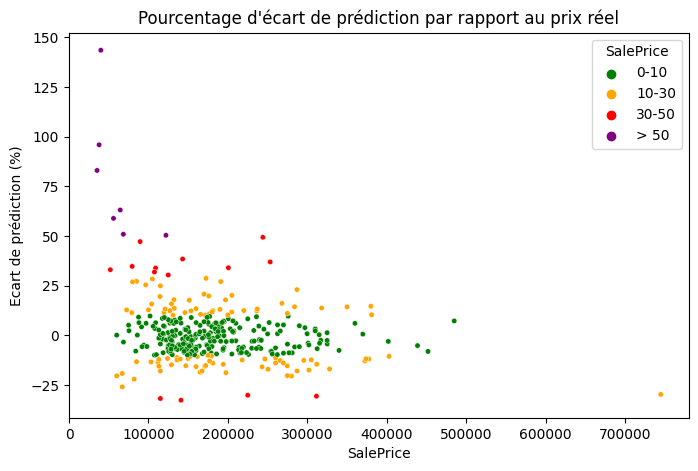

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val, y=perc_ecarts, hue=perc_ecarts_binned, palette=['green', 'orange', 'red', 'purple'], s=15)
plt.xlabel("SalePrice")
plt.ylabel("Ecart de prédiction (%)")
plt.title("Pourcentage d'écart de prédiction par rapport au prix réel")
plt.show()

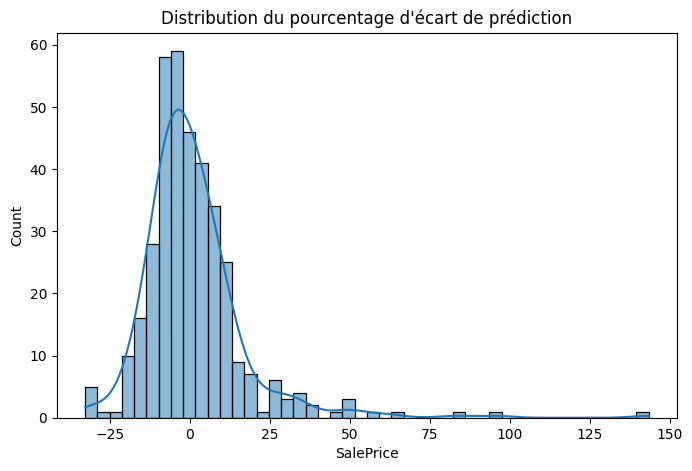

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(perc_ecarts, kde=True)
plt.title("Distribution du pourcentage d'écart de prédiction")
plt.show()

In [ ]:
scaler_cat = OneHotEncoder(drop='first', handle_unknown='ignore')
scaler_num = StandardScaler()
model = xgboost.XGBRegressor(max_depth=3, n_estimators=200)

X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

categorical_transformer = make_pipeline(scaler_cat)
numerical_transformer = make_pipeline(scaler_num)

preprocessor = ColumnTransformer(transformers=[
                                                ('cat', categorical_transformer, categorical_columns),
                                                ('num', numerical_transformer, numerical_columns)
                                              ])

pipeline = make_pipeline(preprocessor, model)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['MSSubClass', 'MSZoning',
                                                   'Street', 'Alley',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofM...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/test.csv')

In [ ]:
id_list = df_test['Id'].values

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
df_test = df_test.drop(['Id'], axis=1)

In [ ]:
df_test['MSSubClass'] = df_test['MSSubClass'].astype('category')
df_test['MSSubClass'].dtype

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
, ordered=False)

In [ ]:
df_test.shape

(1459, 79)

In [ ]:
(df_test.isna().sum()/df_test.shape[0]).sort_values(ascending=False).head(40)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType2    0.028787
BsmtFinType1    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
Functional      0.001371
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
Utilities       0.001371
KitchenQual     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
GarageCars      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
Exterior2nd     0.000685
Exterior1st     0.000685
GarageArea      0.000685
BsmtFinSF2      0.000685
TotRmsAbvGrd    0.000000
KitchenAbvGr    0.000000
Fireplaces      0.000000
MSSubClass      0.000000
HalfBath        0.000000
PavedDrive      0.000000
WoodDeckSF      0.000000


In [ ]:
'''
PoolQC           0.997944
MiscFeature      0.965045
Alley            0.926662
Fence            0.801234
FireplaceQu      0.500343
LotFrontage      0.155586
GarageYrBlt      0.053461
GarageFinish     0.053461
GarageQual       0.053461
GarageCond       0.053461
GarageType       0.052090
BsmtCond         0.030843
BsmtExposure     0.030158
BsmtQual         0.030158
BsmtFinType2     0.028787
BsmtFinType1     0.028787
MasVnrType       0.010966
MasVnrArea       0.010281
MSZoning         0.002742
Functional       0.001371
BsmtHalfBath     0.001371
BsmtFullBath     0.001371
Utilities        0.001371
KitchenQual      0.000685
SaleType         0.000685
BsmtFinSF1       0.000685
GarageCars       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
Exterior2nd      0.000685
Exterior1st      0.000685
GarageArea       0.000685
BsmtFinSF2       0.000685
'''

In [ ]:
def nan_processing(df):
  cat_no_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']

  for column in cat_no_columns:
    df[column] = df[column].fillna('No')


  cat_mode_columns = ['MSZoning', 'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities', 'KitchenQual', 'SaleType',
                      'Exterior2nd', 'Exterior1st']

  for column in cat_mode_columns:
    df[column] = df[column].fillna(df[column].mode()[0])


  num_0_columns = ['MasVnrArea', 'MasVnrArea', 'BsmtFinSF1', 'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF2']

  for column in num_0_columns:
    df[column] = df[column].fillna(0)


  median_by_zone = df.groupby('MSZoning')['LotFrontage'].median()
  df['LotFrontage'].fillna(df['MSZoning'].map(median_by_zone), inplace=True)

  df['BsmtExposure'] = df['BsmtExposure'].fillna('NoB')

  df['MasVnrType'] = df['MasVnrType'].fillna('None')

  df['GarageYrBlt'] = df['GarageYrBlt'].fillna(-1)

  return df

In [ ]:
df_test = nan_processing(df_test)

In [ ]:
(df_test.isna().sum()/df_test.shape[0]).sort_values(ascending=False).head(5)

MSSubClass      0.0
BedroomAbvGr    0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
dtype: float64

In [ ]:
y_pred = pipeline.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
df_result_test = pd.DataFrame({'Id': id_list,
                               'SalePrice': y_pred})

In [ ]:
df_result_test

,Id,SalePrice
0,1461,122375.843750
1,1462,179714.671875
2,1463,172978.531250
3,1464,191001.343750
4,1465,185365.546875
...,...,...
1454,2915,78808.195312
1455,2916,62547.730469
1456,2917,154482.750000
1457,2918,111413.093750


In [ ]:
df_result_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Projet week 2 WCS/df_result_test.csv')